# Set 2: [PCA/Hyperparameter/CV]
**2301212314_ChenYichao_Fintech**

In [2]:
import pandas as pd
import numpy as np
# df = pd.read_csv('../data/cs-training.csv')
df = pd.read_csv(r'D:\大学文件\No.8_2023-2024学年第二学期\机器学习\Kaggle-Give-Me-Some-Data\cs-training.csv')
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Data Preprocessing

In [3]:
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)
df.drop(df.columns[0], axis=1,inplace=True)
df.columns = ['Default'] + ['X'+str(i) for i in range(1,11)]
df

,Default,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [4]:
df.describe()

,Default,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.100404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [5]:
y_train = df['Default'].to_numpy()
X_train = df.drop(df.columns[0], axis=1).values

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)


In [60]:
X_train_std

array([[-0.02115001, -0.49385982,  0.37659296, ...,  4.40954554,
        -0.05785249,  1.12938692],
       [-0.02038516, -0.83234222, -0.10041896, ..., -0.90128301,
        -0.05785249,  0.22062674],
       [-0.02158222, -0.96773518,  0.138087  , ..., -0.90128301,
        -0.05785249, -0.68813345],
       ...,
       [-0.02323239,  0.38619443, -0.10041896, ..., -0.01614492,
        -0.05785249, -0.68813345],
       [-0.02421753, -1.50930703, -0.10041896, ..., -0.90128301,
        -0.05785249, -0.68813345],
       [-0.02081306,  0.79237332, -0.10041896, ...,  0.86899317,
        -0.05785249, -0.68813345]])

In [61]:
X_train_std.shape

(150000, 10)

Eigendecomposition of the covariance matrix.

In [62]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[2.99490718 1.53316723 1.22547774 1.00109294 1.00921456 0.93450362
 0.54303042 0.73465489 0.00680855 0.01720955]


## Total and explained variance

In [63]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.29948872, 0.45280442, 0.57535138, 0.67627216, 0.77638079,
       0.86983053, 0.94329553, 0.99759821, 0.99931915, 1.        ])

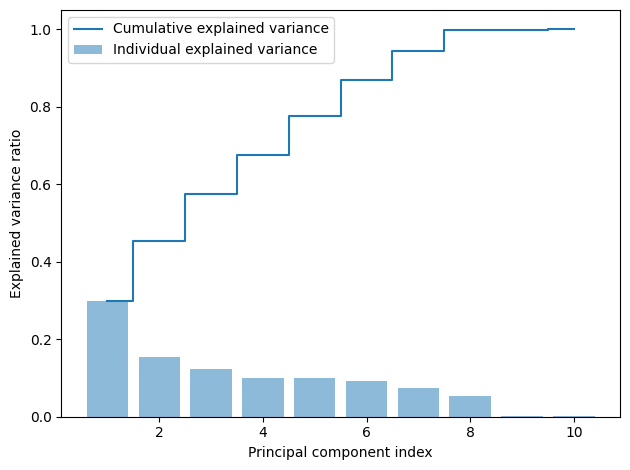

In [64]:
import matplotlib.pyplot as plt


plt.bar(range(1, 11), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 11), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_02.png', dpi=300)
plt.show()

## Feature transformation

In [65]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [66]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-6.21974965e-04  2.58352452e-03]
 [-5.83542851e-02 -1.50578173e-01]
 [ 5.72343768e-01 -6.68771812e-02]
 [-1.20591894e-02 -1.94803694e-01]
 [-1.45744319e-02 -2.61834048e-01]
 [-7.62621488e-02 -6.32668368e-01]
 [ 5.74343853e-01 -4.92941951e-02]
 [-5.27322720e-02 -6.53863817e-01]
 [ 5.74588781e-01 -5.60927665e-02]
 [-6.27907822e-03 -1.81543281e-01]]


In [67]:
X_train_std[0].dot(w)

array([-0.13320231, -3.60795325])

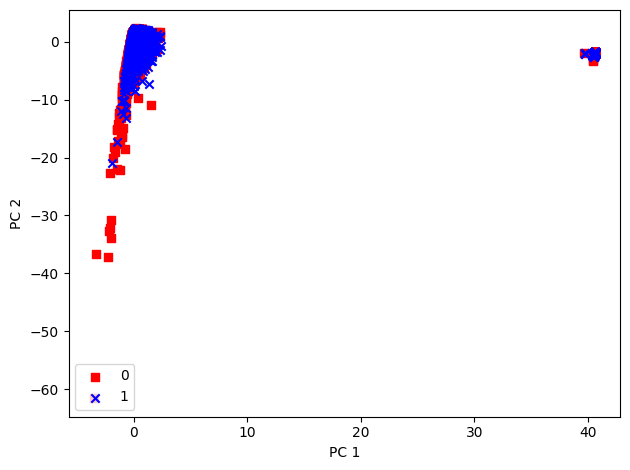

In [68]:
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)


plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [69]:
X_y_combined_std_cut = pd.DataFrame( X_train_pca,y_train)
X_y_combined_std_cut.reset_index(inplace=True)
X_y_combined_std_cut.columns = ['y','X0','X1']
X_y_combined_std_cut=X_y_combined_std_cut[(X_y_combined_std_cut['X1'] <3) & (X_y_combined_std_cut['X0'] <5)]
X_combined_std_cut = X_y_combined_std_cut.values[:,1:]
y_combined_cut = X_y_combined_std_cut.values[:,0]

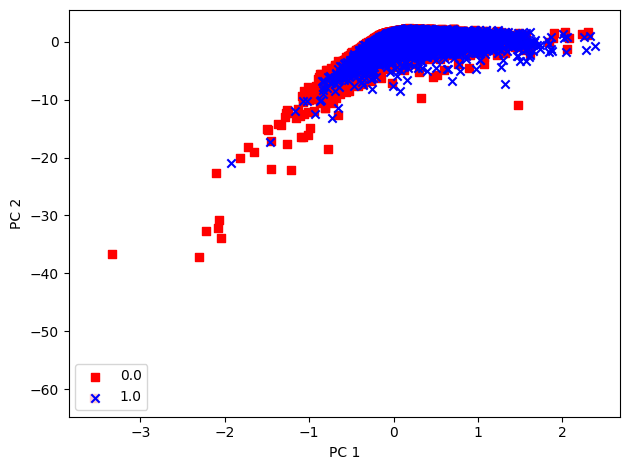

In [70]:

for l, c, m in zip(np.unique(y_combined_cut), colors, markers):
    plt.scatter(X_combined_std_cut[y_combined_cut == l, 0], 
                X_combined_std_cut[y_combined_cut == l, 1], 
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_03.png', dpi=300)
plt.show()

In [32]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions_3d(X, y, classifier, resolution=0.5):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x3_min, x3_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    xx1, xx2, xx3 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                np.arange(x2_min, x2_max, resolution),
                                np.arange(x3_min, x3_max, resolution))
    xx4=xx1

    mesh_data = np.array([xx1.ravel(), xx2.ravel(), xx3.ravel()]).T
    Z = classifier.predict(mesh_data)
    Z = Z.reshape(xx4.shape)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(X[y == cl, 0], X[y == cl, 1], X[y == cl, 2], c=[cmap(idx)], marker=markers[idx], label=cl)

    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())
    ax.set_zlim(xx3.min(), xx3.max())
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')

 

    ax.legend(loc='upper right')

# Training logistic regression classifier using the first 2 principal components.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca_LR = pca.fit_transform(X_train_std)


lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca_LR, y_train)

C:\Users\Eleven最沉着\AppData\Local\Temp\ipykernel_37104\49398212.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


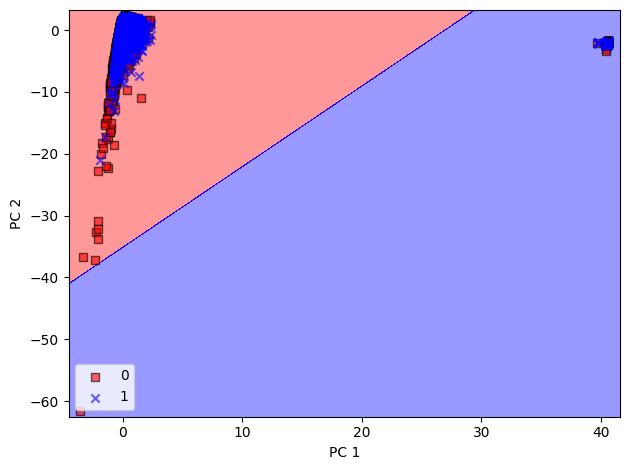

In [73]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

C:\Users\Eleven最沉着\AppData\Local\Temp\ipykernel_37104\49398212.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


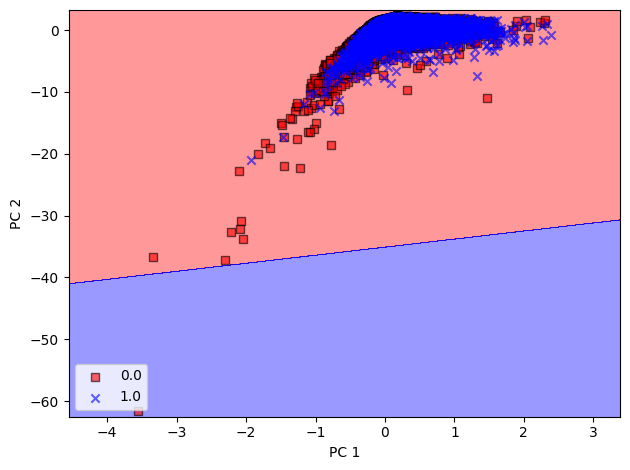

In [74]:
X_y_combined_std_cut = pd.DataFrame( X_train_pca,y_train)
X_y_combined_std_cut.reset_index(inplace=True)
X_y_combined_std_cut.columns = ['y','X0','X1']
X_y_combined_std_cut=X_y_combined_std_cut[(X_y_combined_std_cut['X1'] <10) & (X_y_combined_std_cut['X0'] <5)]
X_combined_std_cut = X_y_combined_std_cut.values[:,1:]
y_combined_cut = X_y_combined_std_cut.values[:,0]
plot_decision_regions(X_combined_std_cut, y_combined_cut, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

## Apply Pipeline, LR, SVM / Decision Tree and try your own hyperparameters to maximize the prediction accuracy

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV




In [28]:
pca = PCA(n_components=3)
X_train_pca1 = pca.fit_transform(X_train_std)


In [17]:
from sklearn.linear_model import LogisticRegression

def bestCofLR(X,y):
    log_reg = LogisticRegression()

    # Define the C value to be attempted
    param_grid = {'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100]}

    # Create a pipeline that includes principal component analysis, logistic regression, and parameter search
    pipeline = Pipeline([
        ('pca', PCA(n_components=2)),  
        ('classifier', GridSearchCV(log_reg, param_grid, cv=5))  
    ])

    # Using Pipeline for overall process: principal component analysis, data standardization, logistic regression parameter search, and model training
    pipeline.fit(X, y)

    # Output the optimal C value
    best_C = pipeline.named_steps['classifier'].best_params_['C']
    print("Best C value:", best_C)
    return pipeline.named_steps['classifier'].best_estimator_

In [18]:
LR=bestCofLR(X_train_std,y_train)
LR

Best C value: 0.0001


LogisticRegression(C=0.0001)

In [19]:
from sklearn.svm import SVC
def bestGammaofSVM(X,y):
    svm = SVC(kernel='linear')

    # Define the C value to be attempted
    param_grid = {'C': [ 0.01,1,10]}

    # Using Grid Search for Parameter Search
    # Create a pipeline that includes principal component analysis, logistic regression, and parameter search
    pipeline = Pipeline([
        ('pca', PCA(n_components=3)),  
        ('classifier', GridSearchCV(svm, param_grid, cv=5))  
    ])

    # Using Pipeline for overall process: principal component analysis, data standardization, logistic regression parameter search, and model training
    pipeline.fit(X, y)

    # Output the optimal C value
    best_C = pipeline.named_steps['classifier'].best_params_['C']
    print("Best C value:", best_C)
    return pipeline.named_steps['classifier'].best_estimator_

In [71]:
SVM=bestGammaofSVM(X_train_std,y_train)
SVM

Best C value: 0.01


SVC(C=0.01, kernel='linear')

In [26]:
from sklearn.tree import DecisionTreeClassifier
def bestDepthofDT(X,y):
    tree = DecisionTreeClassifier()

    # Define the depth value of the tree to be attempted
    param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # Using Grid Search for Parameter Search
    # Create a pipeline that includes principal component analysis, logistic regression, and parameter search
    pipeline = Pipeline([
        ('pca', PCA(n_components=3)),  
        ('classifier', GridSearchCV(tree, param_grid, cv=5))  
    ])

    # Using Pipeline for overall process: principal component analysis, data standardization, logistic regression parameter search, and model training
    pipeline.fit(X, y)

    # Output the optimal C value
    best_depth = pipeline.named_steps['classifier'].best_params_['max_depth']
    print("Best tree depth:", best_depth)
    return pipeline.named_steps['classifier'].best_estimator_

In [27]:
DT=bestDepthofDT(X_train_std,y_train)
DT

Best tree depth: 4


DecisionTreeClassifier(max_depth=4)

## Visualize  classifiers using the `plot_decision_regions` function

C:\Users\Eleven最沉着\AppData\Local\Temp\ipykernel_32648\49398212.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


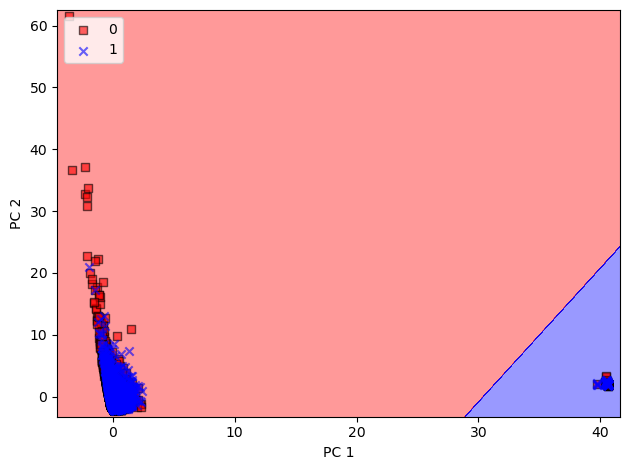

In [34]:
plot_decision_regions(X=X_train_pca_LR, y=y_train,classifier=LR)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

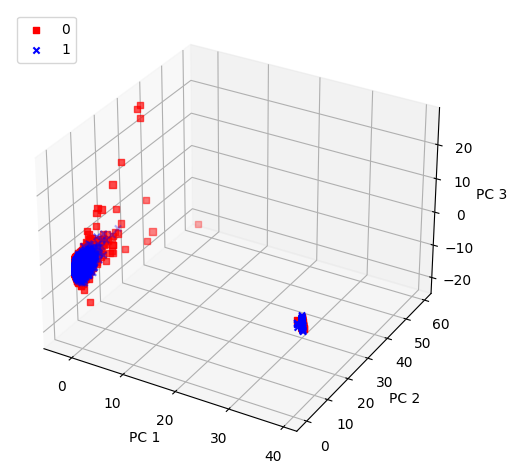

In [195]:
SVM=SVC(kernel='linear',C=0.01).fit(X=X_train_pca1, y=y_train)
plot_decision_regions_3d(X=X_train_pca1, y=y_train, classifier=SVM)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

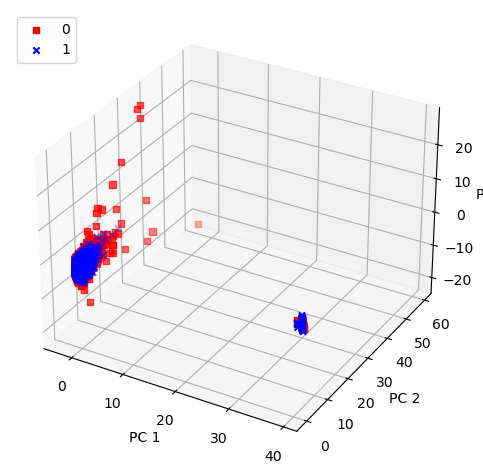

In [35]:
plot_decision_regions_3d(X=X_train_pca1, y=y_train, classifier=DT)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
X_y_combined_std_cut = pd.DataFrame( X_train_pca1,y_train)
X_y_combined_std_cut.reset_index(inplace=True)
X_y_combined_std_cut.columns = ['y','X0','X1','X2']

In [37]:
X_y_combined_std_cut=X_y_combined_std_cut[(X_y_combined_std_cut['X1'] >10) & (X_y_combined_std_cut['X0'] <0)& (X_y_combined_std_cut['X2'] >0)]

In [38]:
X_combined_std_cut = X_y_combined_std_cut.values[:,1:]
y_combined_cut = X_y_combined_std_cut.values[:,0]

C:\Users\Eleven最沉着\AppData\Local\Temp\ipykernel_32648\49398212.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


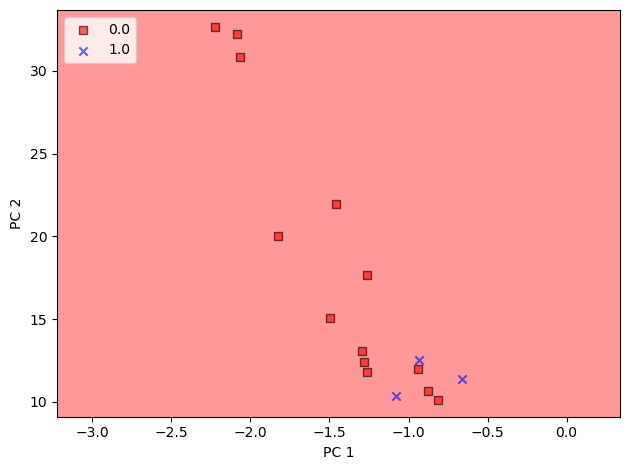

In [39]:
plot_decision_regions(X=X_combined_std_cut, y=y_combined_cut,
                      classifier=LR)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

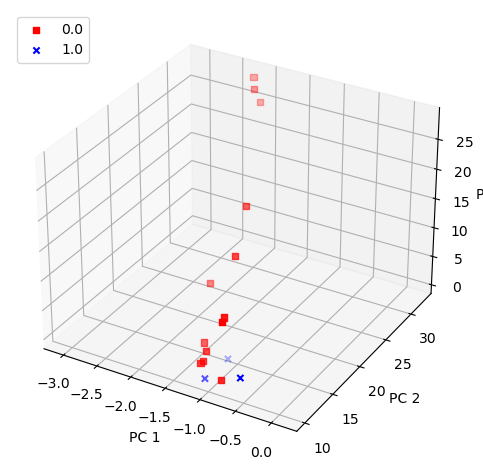

In [43]:
plot_decision_regions_3d(X=X_combined_std_cut, y=y_combined_cut,
                      classifier=SVM)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

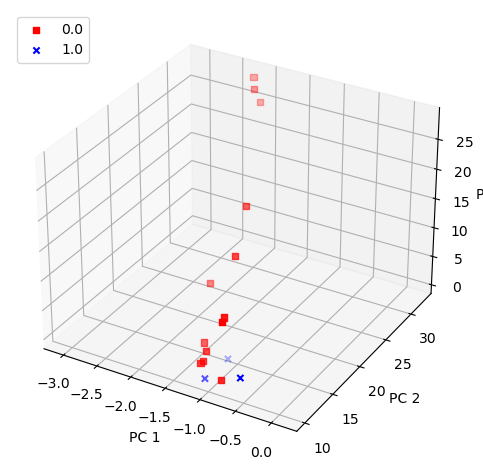

In [41]:
plot_decision_regions_3d(X=X_combined_std_cut, y=y_combined_cut,
                      classifier=DT)

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()